In [ ]:
!pip install torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

100%|██████████| 9.91M/9.91M [00:00<00:00, 15.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 490kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.41MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.58MB/s]


[Epoch 1/50] Loss D: 0.2775, Loss G: 1.1479
[Epoch 2/50] Loss D: 0.3479, Loss G: 1.1720
[Epoch 3/50] Loss D: 0.4260, Loss G: 1.1145
[Epoch 4/50] Loss D: 0.3949, Loss G: 1.2468
[Epoch 5/50] Loss D: 0.6645, Loss G: 0.7496
[Epoch 6/50] Loss D: 0.3532, Loss G: 1.0870
[Epoch 7/50] Loss D: 0.3785, Loss G: 1.1614
[Epoch 8/50] Loss D: 0.4873, Loss G: 0.9022
[Epoch 9/50] Loss D: 0.3703, Loss G: 1.2749
[Epoch 10/50] Loss D: 0.6695, Loss G: 0.9040
[Epoch 11/50] Loss D: 0.4932, Loss G: 0.9300
[Epoch 12/50] Loss D: 0.5242, Loss G: 1.2345
[Epoch 13/50] Loss D: 0.4494, Loss G: 1.1780
[Epoch 14/50] Loss D: 0.5310, Loss G: 0.9189
[Epoch 15/50] Loss D: 0.5883, Loss G: 1.2045
[Epoch 16/50] Loss D: 0.4119, Loss G: 1.3647
[Epoch 17/50] Loss D: 0.7044, Loss G: 0.8088
[Epoch 18/50] Loss D: 0.4063, Loss G: 1.1385
[Epoch 19/50] Loss D: 0.7346, Loss G: 0.6818
[Epoch 20/50] Loss D: 0.4633, Loss G: 1.0736
[Epoch 21/50] Loss D: 0.4816, Loss G: 1.3582
[Epoch 22/50] Loss D: 0.6514, Loss G: 0.8986
[Epoch 23/50] Loss 

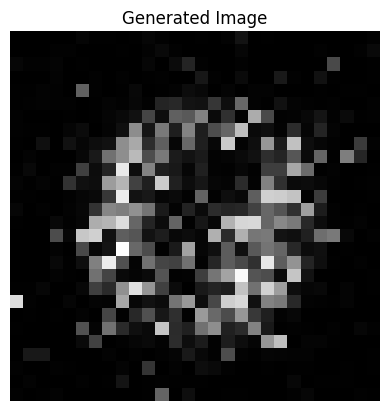

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Hyperparameters
latent_dim = 100
batch_size = 64
epochs = 50
lr = 0.0002

# MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
dataset = datasets.MNIST(root='./data', download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 784),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        return img

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.model(img)

# Initialize models
generator = Generator()
discriminator = Discriminator()

# Loss and Optimizers
loss_fn = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

# Training Loop
for epoch in range(epochs):
    for i, (real_imgs, _) in enumerate(dataloader):

        real_imgs = real_imgs.view(real_imgs.size(0), -1)  # Flatten the images
        valid = torch.ones(real_imgs.size(0), 1)
        fake = torch.zeros(real_imgs.size(0), 1)

        # --- Train Generator ---
        z = torch.randn(real_imgs.size(0), latent_dim)
        gen_imgs = generator(z)
        g_loss = loss_fn(discriminator(gen_imgs), valid)

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

        # --- Train Discriminator ---
        real_loss = loss_fn(discriminator(real_imgs), valid)
        fake_loss = loss_fn(discriminator(gen_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

    print(f"[Epoch {epoch+1}/{epochs}] Loss D: {d_loss.item():.4f}, Loss G: {g_loss.item():.4f}")

# Generate and show fake images
z = torch.randn(1, latent_dim)
generated_image = generator(z).view(28, 28).detach().numpy()

plt.imshow(generated_image, cmap='gray')
plt.title("Generated Image")
plt.axis('off')
plt.show()

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ankitpatilbpl/deepfake-dataset-small-size")

print("Path to dataset files:", path)

100%|██████████| 60.0M/60.0M [00:00<00:00, 198MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ankitpatilbpl/deepfake-dataset-small-size/versions/1


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import save_image
import os

# Hyperparameters
latent_dim = 100
image_size = 64
channels = 3
batch_size = 64
epochs = 100
lr = 0.0002

# Transform: resize and normalize images
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*channels, [0.5]*channels)
])

# Dataset: Replace with your face dataset path
dataset = datasets.ImageFolder(root='/root/.cache/kagglehub/datasets/ankitpatilbpl/deepfake-dataset-small-size/versions/1', transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Generator Network
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, image_size * image_size * channels),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.net(z).view(-1, channels, image_size, image_size)
        return img

# Discriminator Network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(image_size * image_size * channels, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.net(img)

# Initialize models
generator = Generator()
discriminator = Discriminator()

# Loss and Optimizers
loss_fn = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

# Training Loop
os.makedirs('generated_faces', exist_ok=True)

for epoch in range(epochs):
    for i, (imgs, _) in enumerate(dataloader):

        valid = torch.ones(imgs.size(0), 1)
        fake = torch.zeros(imgs.size(0), 1)

        # Flatten images
        real_imgs = imgs

        # --- Train Generator ---
        z = torch.randn(imgs.size(0), latent_dim)
        gen_imgs = generator(z)
        g_loss = loss_fn(discriminator(gen_imgs), valid)

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

        # --- Train Discriminator ---
        real_loss = loss_fn(discriminator(real_imgs), valid)
        fake_loss = loss_fn(discriminator(gen_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

    print(f"Epoch {epoch+1}/{epochs} | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

    # Save generated images every few epochs
    if (epoch + 1) % 10== 0:
        save_image(gen_imgs.data[:25], f"generated_faces/epoch_{epoch+1}.png", nrow=5, normalize=True)

Epoch 1/100 | D Loss: 0.1958 | G Loss: 1.1303
Epoch 2/100 | D Loss: 0.0767 | G Loss: 1.9766
Epoch 3/100 | D Loss: 0.0571 | G Loss: 2.2474
Epoch 4/100 | D Loss: 0.0708 | G Loss: 2.1207
Epoch 5/100 | D Loss: 0.0948 | G Loss: 1.7736
Epoch 6/100 | D Loss: 0.1250 | G Loss: 1.9413
Epoch 7/100 | D Loss: 0.6260 | G Loss: 0.3729
Epoch 8/100 | D Loss: 0.5907 | G Loss: 0.4251
Epoch 9/100 | D Loss: 0.3384 | G Loss: 0.9319
Epoch 10/100 | D Loss: 0.2393 | G Loss: 1.2328
Epoch 11/100 | D Loss: 0.2415 | G Loss: 1.1905
Epoch 12/100 | D Loss: 0.2654 | G Loss: 1.0496
Epoch 13/100 | D Loss: 0.2249 | G Loss: 1.1606
Epoch 14/100 | D Loss: 0.2191 | G Loss: 1.1604
Epoch 15/100 | D Loss: 0.1733 | G Loss: 1.4895
Epoch 16/100 | D Loss: 0.2482 | G Loss: 1.3732
Epoch 17/100 | D Loss: 0.2473 | G Loss: 1.3125
Epoch 18/100 | D Loss: 0.1935 | G Loss: 1.2782
Epoch 19/100 | D Loss: 0.1850 | G Loss: 1.6134
Epoch 20/100 | D Loss: 0.2609 | G Loss: 1.2861
Epoch 21/100 | D Loss: 0.1587 | G Loss: 1.6142
Epoch 22/100 | D Loss:

In [ ]:
import torch
from torchvision import transforms
from PIL import Image

# Preprocess the image same as training
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# Load your image
img = Image.open("/content/FAULKHNZJQ.jpg").convert("RGB")
img = transform(img).unsqueeze(0)  # Add batch dimension

# Predict
discriminator.eval()
with torch.no_grad():
    prediction = discriminator(img)

# Print result
if prediction.item() >= 0.5:
    print("✅ Real (True)")
else:
    print("❌ Fake (False)")

❌ Fake (False)


/content/encoder4editing
--2025-06-14 17:20:11--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-06-14 17:20:12--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  44.4MB/s    in 1.4s    

2025-06-14 17:20:13 (44.4 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



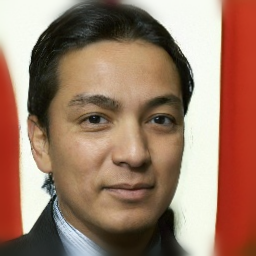

In [ ]:
import dlib
from utils.alignment import align_face
from PIL import Image
import os

# Ensure we're in the correct working directory
%cd /content/encoder4editing

# Download and extract the shape predictor
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2

# Check if the file exists
file_path = "shape_predictor_68_face_landmarks.dat"
if not os.path.exists(file_path):
    raise FileNotFoundError(f"{file_path} not found!")

# Load predictor
predictor = dlib.shape_predictor(file_path)

# Make sure image_path is defined (you must upload an image before this)
try:
    aligned_image = align_face(filepath=image_path, predictor=predictor)
except Exception as e:
    raise RuntimeError(f"Alignment failed: {e}")

# Save and display aligned image
aligned_image.save(f"aligned_{image_path}")

# Display image
from IPython.display import display
display(aligned_image)
